## Text Mining on Indonesian Names

I obtained the "Indonesian Names" dataset from Kaggle https://www.kaggle.com/dionisiusdh/indonesian-names

From this dataset, I'd like to know the majority of names used by Indonesian people based on the dataset, both overall and in terms of the gender.

The steps conducted in this case including:
- Exploratory Data Analysis
- Text Pre-processing
- Feature Extraction
- Visualizing Top Indonesian Names

In [1]:
# Import Data
import pandas as pd

names = pd.read_csv(r'D:/VIA/GITHUB/Text Mining on Indonesian Names/indonesian-names.csv')

#### Exploratory Data Analysis

In [2]:
print('Number of rows in data :', names.shape[0])
print('Number of columns in data :', names.shape[1])
print('\n')
print('Sample data :')
names.head()

Number of rows in data : 1960
Number of columns in data : 2


Sample data :


,name,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m


From the results, it is known that there are 1.960 names contained in the dataset.

In [3]:
# Checking Missing Value
names.isnull().sum()

name      0
gender    0
dtype: int64

There is no missing values in both name and gender variables.

In [4]:
# Checking Genres on the Dataset
names.gender.unique()

array(['m', 'f'], dtype=object)

In [5]:
# Checking the Amount of Data on Each Class
names["gender"].value_counts()

m    1094
f     866
Name: gender, dtype: int64

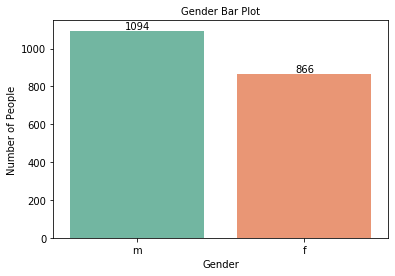

In [6]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

x = names.gender.unique()       # Define the x for x-axis
y = names.gender.value_counts() # Define the y for y-axis
dt = pd.DataFrame(data = {'Gender': x, 'Number of People': y})    # Create dataframe to support the plotting below 
dt = dt.sort_values(by = ['Number of People'], ascending = False) # Sort dataframe from the from largest to smallest

# Plot
f, ax = plt.subplots(figsize = (6, 4))
sns.barplot(x, y, palette = 'Set2')           # Create plot with x-axis is x and y-axis is y
plt.title('Gender Bar Plot', fontsize = 10)   # Name the plot
plt.xlabel('Gender', fontsize = 10)           # Name the x-axis
plt.ylabel('Number of People', fontsize = 10) # Name the y-axis

# Adding the Text labels
rects = ax.patches
labels = dt['Number of People']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 10)
plt.show() # Print the plot

The barplot above shows that in the dataset there are 1.094 male names and 866 female names.

#### Text Pre-Processing

Text pre-processing conducted includes :
- Case Folding and Data Cleaning
- Tokenization

In [7]:
# Convert News Title into String
import numpy as np

names_name = names['name']
names_name = names_name.astype(str)
np.shape(names_name)

(1960,)

In [8]:
# Lowercase
import re
import string
import unicodedata

table = str.maketrans(dict.fromkeys(string.punctuation))

data_lower = []
for line in names_name:
    result = line.lower() # Lowercase
    data_lower.append(result)
data_lower

['hafizhan shidqi',
 'gandhi wibowo',
 'aldio mahendra purwandrarto',
 'benny putra',
 'vicky vernando dasta',
 'jufianto henri',
 'aan nuraini',
 'abdur rahman',
 'abdurrahman',
 'ade indra sukma',
 'ade irmayani',
 'bakti yoga fiyandana',
 'daniel sepra fatama',
 'dayu m sandro',
 'dean mareti hariani',
 'edi kurniawan wibowo',
 'fadil rahmat andini',
 'fahmi iqbal firmananda',
 'fairuzi',
 'gustian',
 "habil sabilla do'a",
 'hermawan syah',
 'ibnuyohanzah ahmad',
 'lia pertiwi',
 'muhammad maksum sugondo',
 'muhammad risfandanu',
 'adnil riza',
 'nadia gustiana',
 'nanda aditya',
 'nurgivo alfajri',
 'pita irul sayekti',
 'rahmadi gusri',
 'rahmat',
 'sadra wilis',
 'said rio apriadi',
 'tania rahmadhini',
 'tarikhul mahfudz',
 'vido idramedi',
 'wahyu darmawan',
 'yana famana',
 'yusrika dewi',
 'zakiah nurviani',
 'aditya dwi nugraha',
 'afrian djugi',
 'debby jayadi nugroho',
 'dede dwi arviyanti',
 'della maulina herianda',
 'deny gustriansyah',
 'desi fitri',
 'edmund andriano'

In [9]:
# Removing Punctuations
import re
import string

data_clean = []
for line in data_lower:
    result = re.sub(r"[^\w\s]","", line)  # Removing Punctuations
    data_clean.append(result)
data_clean

['hafizhan shidqi',
 'gandhi wibowo',
 'aldio mahendra purwandrarto',
 'benny putra',
 'vicky vernando dasta',
 'jufianto henri',
 'aan nuraini',
 'abdur rahman',
 'abdurrahman',
 'ade indra sukma',
 'ade irmayani',
 'bakti yoga fiyandana',
 'daniel sepra fatama',
 'dayu m sandro',
 'dean mareti hariani',
 'edi kurniawan wibowo',
 'fadil rahmat andini',
 'fahmi iqbal firmananda',
 'fairuzi',
 'gustian',
 'habil sabilla doa',
 'hermawan syah',
 'ibnuyohanzah ahmad',
 'lia pertiwi',
 'muhammad maksum sugondo',
 'muhammad risfandanu',
 'adnil riza',
 'nadia gustiana',
 'nanda aditya',
 'nurgivo alfajri',
 'pita irul sayekti',
 'rahmadi gusri',
 'rahmat',
 'sadra wilis',
 'said rio apriadi',
 'tania rahmadhini',
 'tarikhul mahfudz',
 'vido idramedi',
 'wahyu darmawan',
 'yana famana',
 'yusrika dewi',
 'zakiah nurviani',
 'aditya dwi nugraha',
 'afrian djugi',
 'debby jayadi nugroho',
 'dede dwi arviyanti',
 'della maulina herianda',
 'deny gustriansyah',
 'desi fitri',
 'edmund andriano',

In [10]:
# Tokenization
import spacy

nlp = spacy.load('en_core_web_lg', disable = ['parser','ner'])
temp = []
for line in data_clean:
    doc = nlp(line)
    temp.append(doc)

token_list = []
for line in temp:
    temp1 = []
    for token in line:
        temp1.append(token.text)
    token_list.append(temp1)
print(np.shape(token_list))

(1960,)


#### Feature Extraction

In [11]:
# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy.sparse

df_token = []
for line in token_list:
    df_token.append(" ".join(line))
df_token

count_vect = CountVectorizer(min_df = 1)
df_counts = count_vect.fit_transform(df_token)
feature_names = count_vect.get_feature_names()

features = pd.DataFrame.sparse.from_spmatrix(df_counts, columns = feature_names)
features.head()

,aam,aan,abas,abdan,abdi,abdilah,abdillah,abdul,abdullah,abdur,...,zidane,zilan,zubaidah,zuhdi,zuhriyah,zukri,zul,zulaiha,zulaikha,zulvan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Visualizing Top Indonesian Names

In [12]:
# Import Package for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Create DataFrame for Visualization
male = names['gender'] == 'm'
female = names['gender'] == 'f'

all_names = feature_names
all_names_sum = features.iloc[:,:].sum().tolist()
all_male_names_sum = features.iloc[male[male].index.values].sum().tolist()
all_female_names_sum = features.iloc[female[female].index.values].sum().tolist()

sum_of_feature = pd.DataFrame({'Names': all_names,
                               'Total Names': all_names_sum,
                               'Total Male Names': all_male_names_sum,
                               'Total Female Names': all_female_names_sum})

In [14]:
sum_of_feature.head(3)

,Names,Total Names,Total Male Names,Total Female Names
0,aam,1,0,1
1,aan,2,0,2
2,abas,1,1,0


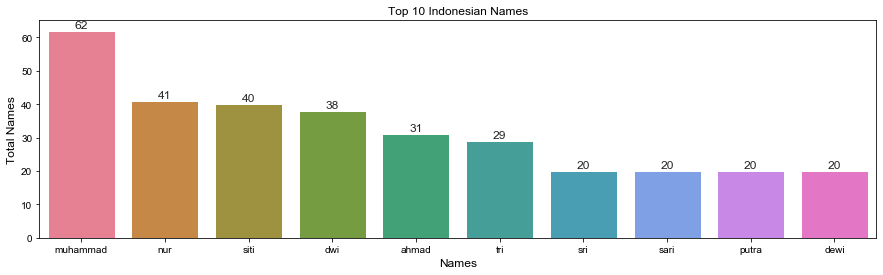

In [15]:
# Show the Top 10 Indonesian Names
sum_of_feature.sort_values(by = ['Total Names','Names'], inplace = True, ascending = False)
dt = sum_of_feature.head(10)

# Plot
f, ax = plt.subplots(figsize = (15, 4))
sns.set(font_scale = 1, style = "white")
sns.barplot(dt['Names'], dt['Total Names'], palette = "husl")
plt.title('Top 10 Indonesian Names', fontsize = 12) # Name the plot
plt.xlabel('Names', fontsize = 12)                  # Name the x-axis
plt.ylabel('Total Names', fontsize = 12)            # Name the y-axis

# Adding the Text labels
rects = ax.patches
labels = dt['Total Names']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 12)
plt.show()

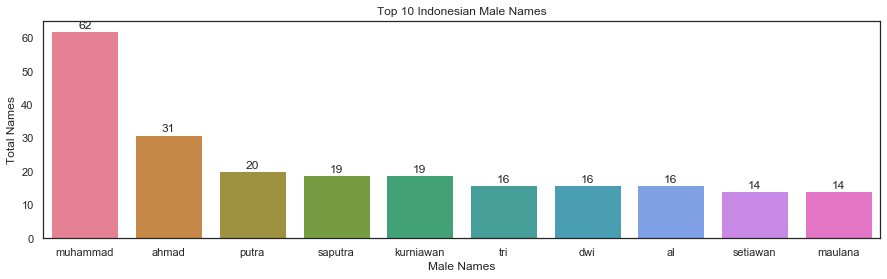

In [16]:
# Show the Top 10 Indonesian Names
sum_of_feature.sort_values(by = ['Total Male Names','Names'], inplace = True, ascending = False)
dt = sum_of_feature.head(10)

# Plot
f, ax = plt.subplots(figsize = (15, 4))
sns.set(font_scale = 1, style = "white")
sns.barplot(dt['Names'], dt['Total Male Names'], palette = "husl")
plt.title('Top 10 Indonesian Male Names', fontsize = 12) # Name the plot
plt.xlabel('Male Names', fontsize = 12)                  # Name the x-axis
plt.ylabel('Total Names', fontsize = 12)                 # Name the y-axis

# Adding the Text labels
rects = ax.patches
labels = dt['Total Male Names']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 12)
plt.show()

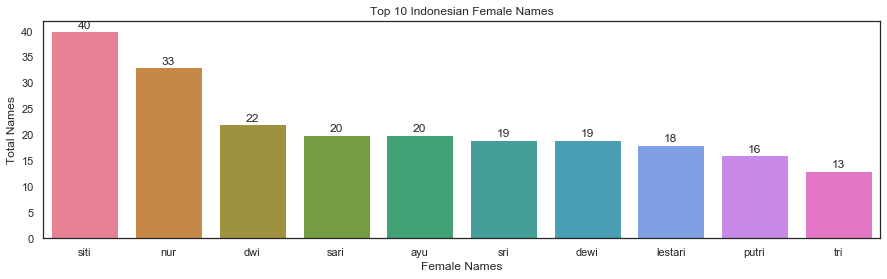

In [17]:
# Show the Top 10 Indonesian Names
sum_of_feature.sort_values(by = ['Total Female Names','Names'], inplace = True, ascending = False)
dt = sum_of_feature.head(10)

# Plot
f, ax = plt.subplots(figsize = (15, 4))
sns.set(font_scale = 1, style = "white")
sns.barplot(dt['Names'], dt['Total Female Names'], palette = "husl")
plt.title('Top 10 Indonesian Female Names', fontsize = 12) # Name the plot
plt.xlabel('Female Names', fontsize = 12)                  # Name the x-axis
plt.ylabel('Total Names', fontsize = 12)                   # Name the y-axis

# Adding the Text labels
rects = ax.patches
labels = dt['Total Female Names']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 12)
plt.show()